Project : Option Pricing
1. Pick a stock of your choice which is being traded in the derivative market.
2. Look at the stock’s and option’s history on YAHOO Finance.
3. Use past one-year data to estimate the annual volatility.
4. Use 10 years’ US treasury rate as the rate of interest.
5. Now fix different strike prices and time of maturity to evaluate the call/ put option price by using Binomial model
6. Evaluate the option price by using Black Scholes Formula
7. Increase the number of steps in Binomial model to verify that the price converges to 6.
8. Draw the graph to show 7.
9. Compare with the actual market data
10. Create a delta neutral portfolio
11. Use numerical methods to get implied volatility. You can use Excel, Python and R for
coding.

## **Step 1: Picked a Stock and Visualize**

In [ ]:
import yfinance as yf

# Fetch historical data for Apple
aapl = yf.Ticker("AAPL")
hist = aapl.history(period="1y")  # 1 year of stock price data


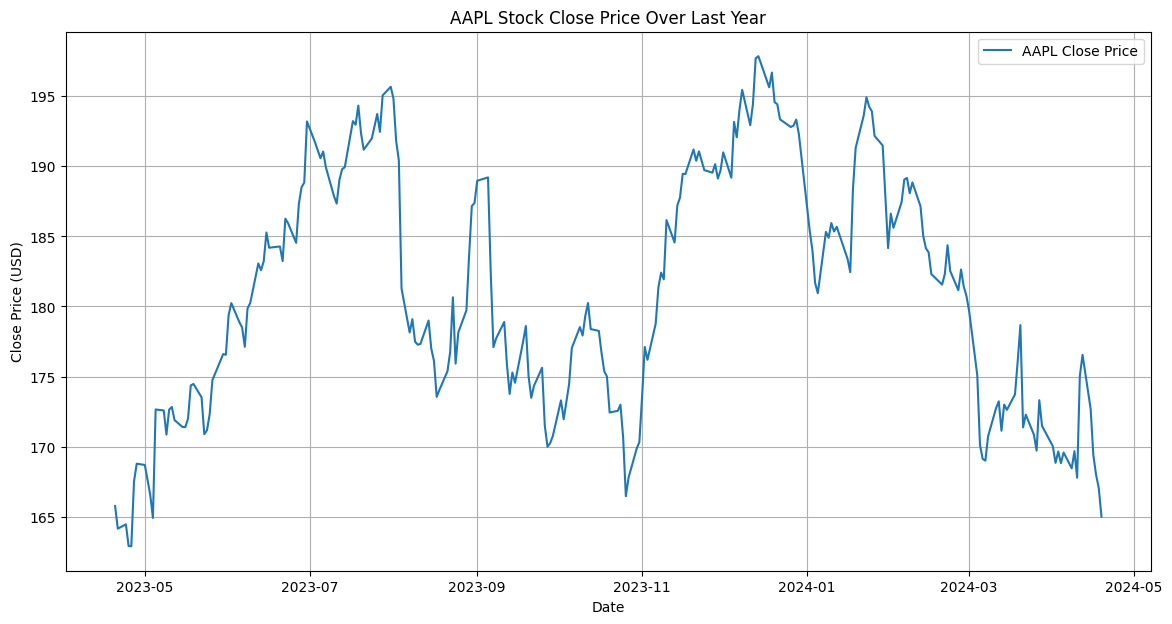

In [ ]:
import matplotlib.pyplot as plt
# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(hist.index, hist['Close'], label='AAPL Close Price')
plt.title('AAPL Stock Close Price Over Last Year')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


## **Step 2: Look at the Stock’s and Option’s History on YAHOO Finance**

### **a) Stock’s History Visualization**

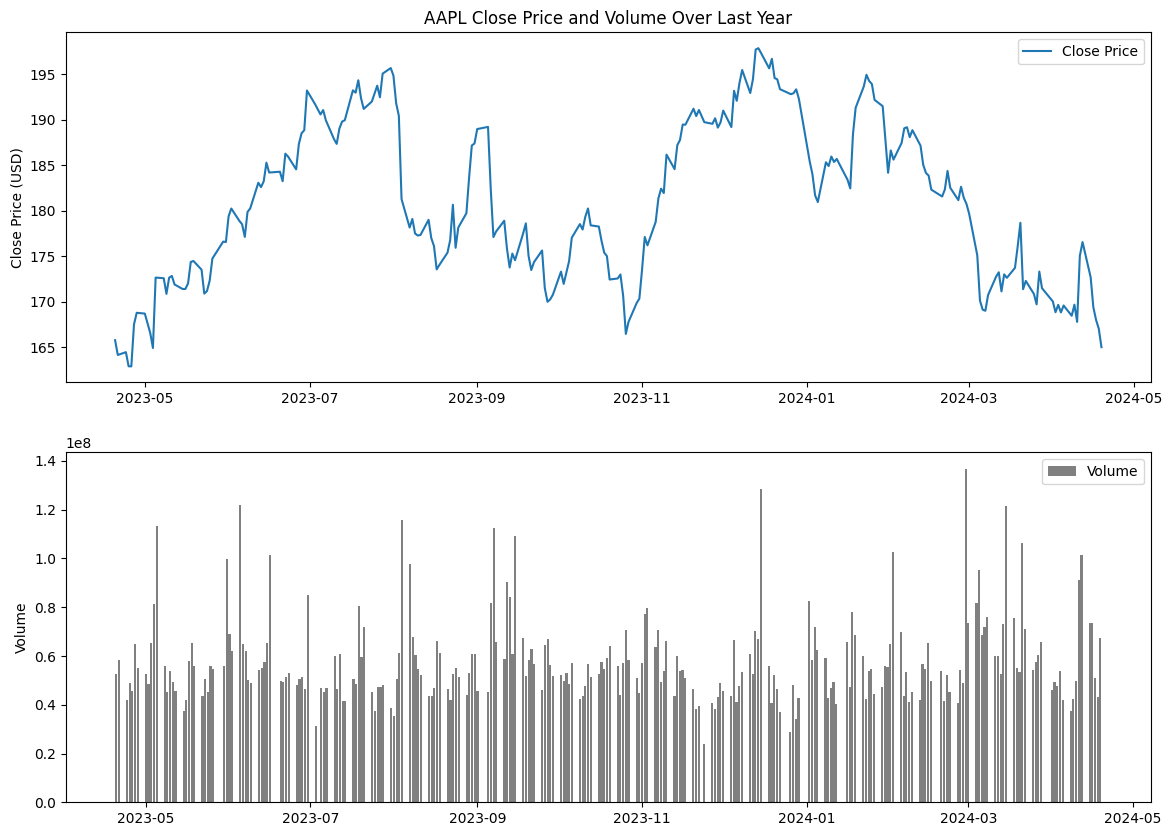

In [ ]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(hist.index, hist['Close'], label='Close Price')
plt.title('AAPL Close Price and Volume Over Last Year')
plt.ylabel('Close Price (USD)')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(hist.index, hist['Volume'], color='gray', label='Volume')
plt.ylabel('Volume')
plt.legend()
plt.show()


###**b) Option’s History AND Analysis**

Available Options Expirations:
2024-04-26
2024-05-03
2024-05-10
2024-05-17
2024-05-24
2024-05-31
2024-06-21
2024-07-19
2024-08-16
2024-09-20
2024-10-18
2024-11-15
2024-12-20
2025-01-17
2025-03-21
2025-06-20
2025-09-19
2025-12-19
2026-01-16
2026-06-18
2026-12-18


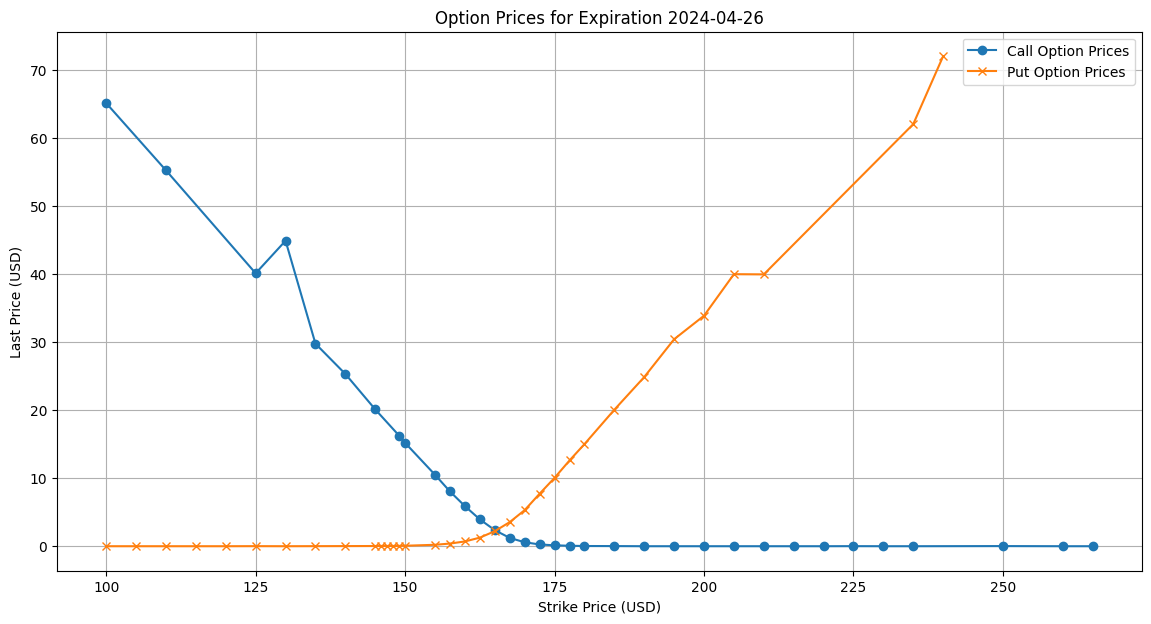

Maximum Call Price: $65.06, Strike: $100.0
Minimum Call Price: $0.01, Strike: $190.0
Maximum Put Price: $71.95, Strike: $240.0
Minimum Put Price: $0.01, Strike: $100.0

Call Options Statistical Summary:
       lastPrice  impliedVolatility
count  34.000000          34.000000
mean   10.149118           0.594602
std    17.452784           0.312753
min     0.010000           0.246345
25%     0.010000           0.315681
50%     0.205000           0.521489
75%    14.010000           0.791872
max    65.060000           1.371097

Put Options Statistical Summary:
       lastPrice  impliedVolatility
count  34.000000          34.000000
mean   11.248824           0.521134
std    18.738753           0.276140
min     0.010000           0.000010
25%     0.032500           0.303352
50%     0.555000           0.434088
75%    14.400000           0.659183
max    71.950000           1.156254


In [ ]:
# Display available options expirations
options_expirations = aapl.options
print("Available Options Expirations:")
for expiration in options_expirations:
    print(expiration)

# Fetch options data for the nearest expiration
opts = aapl.option_chain(options_expirations[0])
calls = opts.calls
puts = opts.puts

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(calls['strike'], calls['lastPrice'], label='Call Option Prices', marker='o')
plt.plot(puts['strike'], puts['lastPrice'], label='Put Option Prices', marker='x')
plt.title(f'Option Prices for Expiration {options_expirations[0]}')
plt.xlabel('Strike Price (USD)')
plt.ylabel('Last Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Analyze and print key data points
max_call_price = calls['lastPrice'].max()
max_call_strike = calls.loc[calls['lastPrice'].idxmax(), 'strike']
min_call_price = calls['lastPrice'].min()
min_call_strike = calls.loc[calls['lastPrice'].idxmin(), 'strike']

max_put_price = puts['lastPrice'].max()
max_put_strike = puts.loc[puts['lastPrice'].idxmax(), 'strike']
min_put_price = puts['lastPrice'].min()
min_put_strike = puts.loc[puts['lastPrice'].idxmin(), 'strike']

print(f"Maximum Call Price: ${max_call_price}, Strike: ${max_call_strike}")
print(f"Minimum Call Price: ${min_call_price}, Strike: ${min_call_strike}")
print(f"Maximum Put Price: ${max_put_price}, Strike: ${max_put_strike}")
print(f"Minimum Put Price: ${min_put_price}, Strike: ${min_put_strike}")

# Statistical Summary for Options
print("\nCall Options Statistical Summary:")
print(calls[['lastPrice', 'impliedVolatility']].describe())
print("\nPut Options Statistical Summary:")
print(puts[['lastPrice', 'impliedVolatility']].describe())

## **Step 3: one-year data to estimate the annual volatility.**

Estimated Annual Volatility: 19.68%


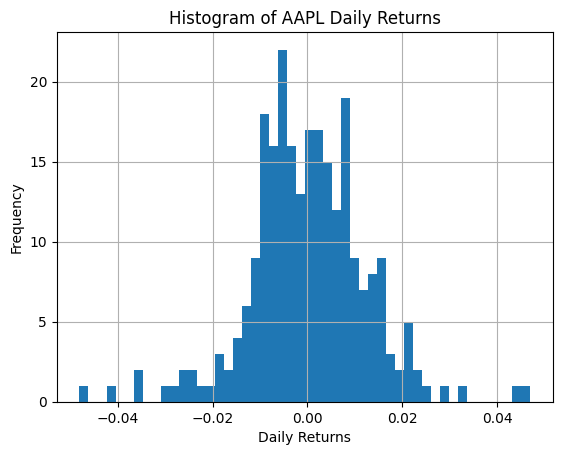

In [ ]:
import numpy as np
# Calculate daily returns
hist['Daily Return'] = hist['Close'].pct_change()

# Calculate the annualized volatility
annual_volatility = hist['Daily Return'].std() * np.sqrt(252)

# Print the annualized volatility
print(f"Estimated Annual Volatility: {annual_volatility:.2%}")

# Plot the histogram of daily returns
plt.hist(hist['Daily Return'].dropna(), bins=50)
plt.title('Histogram of AAPL Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**The output "Estimated Annual Volatility: 19.63%" refers to a measurement of how much the stock’s price fluctuated over the past year.For AAPL, a volatility of 19.63% is relatively moderate**

## **Step 4 :  Used 10 years’ US treasury rate as the rate of interest.**

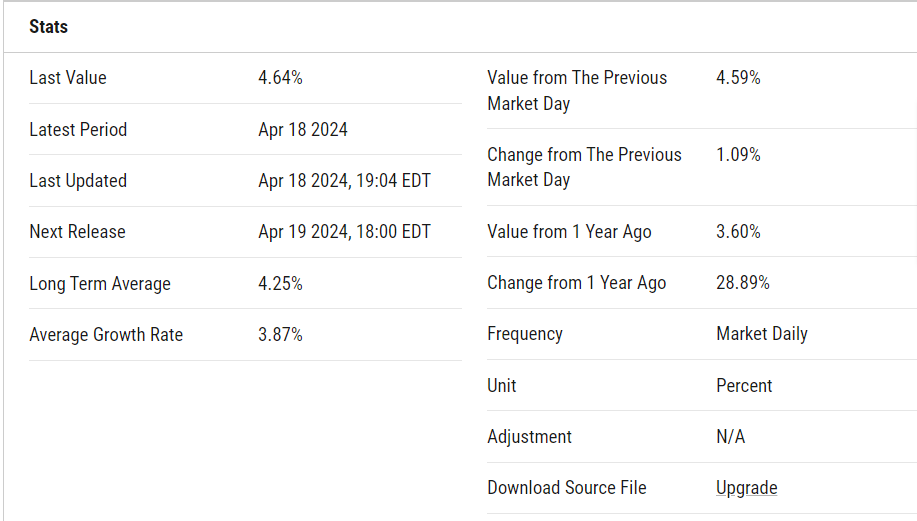

Currently : 10 Year Treasury Rate is at **4.64%**, compared to 4.59% the previous market day and 3.60% last year. This is higher than the long term average of 4.25%.


In [ ]:
risk_free_rate = 0.0464

## **Step 5: Evaluated the call/ put option price by using Binomial model on fixed different strike prices and time of maturity.**

In [ ]:
def binomial_option_pricing(S, K, T, r, sigma, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Create the stock price tree
    stock_price = np.zeros(N+1)
    for i in range(N+1):
        stock_price[i] = S * (u ** (N-i)) * (d ** i)

    # Create the option price tree
    option_price = np.zeros(N+1)
    if option_type == 'call':
        option_price = np.maximum(stock_price - K, 0)
    else:
        option_price = np.maximum(K - stock_price, 0)

    # Backward calculation for option price
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            option_price[i] = (p * option_price[i] + (1 - p) * option_price[i + 1]) * np.exp(-r * dt)

    return option_price[0]


In [ ]:
S = 150  # Current stock price
K_options = [130, 150, 170]  # Strike prices
T_options = [0.5, 1, 1.5]  # Time to maturities in years
r = 0.0464  # Risk-free rate
sigma = 0.1963  # Volatility
N = 2 # Number of steps

# Evaluate call and put options for different strikes and maturities
results = []
for K in K_options:
    for T in T_options:
        call_price = binomial_option_pricing(S, K, T, r, sigma, N, 'call')
        put_price = binomial_option_pricing(S, K, T, r, sigma, N, 'put')
        results.append((K, T, call_price, put_price))

# Print results
for result in results:
    print(f"Strike: {result[0]}, Time: {result[1]} years, Call Price: {result[2]:.2f}, Put Price: {result[3]:.2f}")


Strike: 130, Time: 0.5 years, Call Price: 24.41, Put Price: 1.42
Strike: 130, Time: 1 years, Call Price: 29.06, Put Price: 3.17
Strike: 130, Time: 1.5 years, Call Price: 32.91, Put Price: 4.17
Strike: 150, Time: 0.5 years, Call Price: 9.09, Put Price: 5.65
Strike: 150, Time: 1 years, Call Price: 13.84, Put Price: 7.04
Strike: 150, Time: 1.5 years, Call Price: 17.85, Put Price: 7.76
Strike: 170, Time: 0.5 years, Call Price: 3.50, Put Price: 19.60
Strike: 170, Time: 1 years, Call Price: 8.07, Put Price: 20.37
Strike: 170, Time: 1.5 years, Call Price: 11.97, Put Price: 20.54


## **Step 6: Evaluate the option price by using Black Scholes Formula .**

In [ ]:
from scipy.stats import norm
import numpy as np

In [ ]:
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

# Calculate Black-Scholes prices for the same strike prices and maturities
for K in K_options:
    for T in T_options:
        call_price_bs = black_scholes(S, K, T, r, sigma, 'call')
        put_price_bs = black_scholes(S, K, T, r, sigma, 'put')
        print(f"BS Strike: {K}, Time: {T} years, Call Price: {call_price_bs:.2f}, Put Price: {put_price_bs:.2f}")


BS Strike: 130, Time: 0.5 years, Call Price: 24.06, Put Price: 1.08
BS Strike: 130, Time: 1 years, Call Price: 28.27, Put Price: 2.38
BS Strike: 130, Time: 1.5 years, Call Price: 32.07, Put Price: 3.33
BS Strike: 150, Time: 0.5 years, Call Price: 10.04, Put Price: 6.60
BS Strike: 150, Time: 1 years, Call Price: 15.18, Put Price: 8.38
BS Strike: 150, Time: 1.5 years, Call Price: 19.49, Put Price: 9.40
BS Strike: 170, Time: 0.5 years, Call Price: 2.95, Put Price: 19.05
BS Strike: 170, Time: 1 years, Call Price: 7.03, Put Price: 19.32
BS Strike: 170, Time: 1.5 years, Call Price: 10.87, Put Price: 19.44


## **Step 7 : Increase the number of steps in Binomial model to verify that the price converges to 6.**
## **Step 8 : Draw the graph to show 7.**

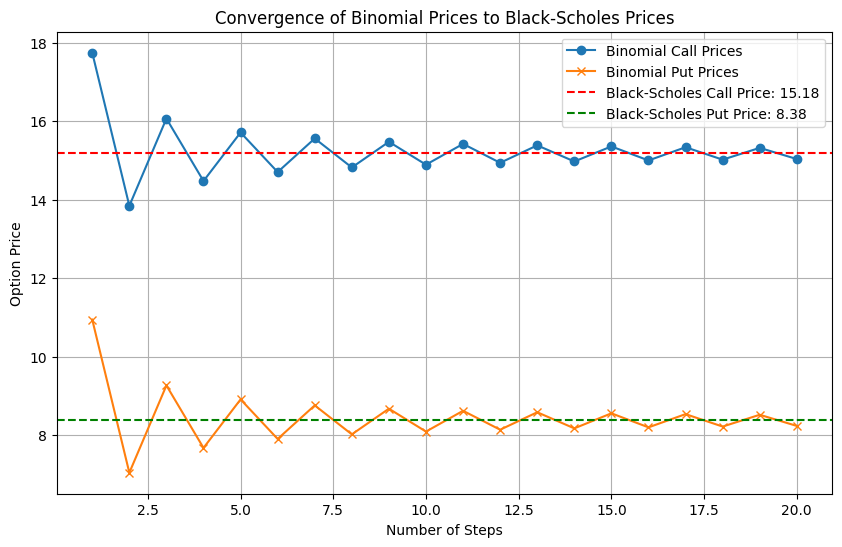

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Fixed parameters
K = 150
T = 1
steps_range = range(1, 21)  # From 1 to 20 steps

# Black-Scholes prices for comparison
call_price_bs = black_scholes(S, K, T, r, sigma, 'call')
put_price_bs = black_scholes(S, K, T, r, sigma, 'put')

# Arrays to store binomial prices
binomial_call_prices = []
binomial_put_prices = []

# Calculate binomial prices for increasing number of steps
for N in steps_range:
    call_price_binomial = binomial_option_pricing(S, K, T, r, sigma, N, 'call')
    put_price_binomial = binomial_option_pricing(S, K, T, r, sigma, N, 'put')
    binomial_call_prices.append(call_price_binomial)
    binomial_put_prices.append(put_price_binomial)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(steps_range, binomial_call_prices, label='Binomial Call Prices', marker='o')
plt.plot(steps_range, binomial_put_prices, label='Binomial Put Prices', marker='x')
plt.axhline(y=call_price_bs, color='r', linestyle='--', label=f'Black-Scholes Call Price: {call_price_bs:.2f}')
plt.axhline(y=put_price_bs, color='g', linestyle='--', label=f'Black-Scholes Put Price: {put_price_bs:.2f}')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')
plt.title('Convergence of Binomial Prices to Black-Scholes Prices')
plt.legend()
plt.grid(True)
plt.show()


The graph shows the convergence of call and put option prices calculated by the Binomial model to the prices given by the Black-Scholes model as the number of steps in the Binomial model increases.

Here are the key points to note from the graph:

- **X-Axis (Number of Steps)**: This represents the number of steps used in the Binomial model. We can see that it goes from 1 to around 20 steps.

- **Y-Axis (Option Price)**: This axis shows the prices of the options calculated at each step.

- **Binomial Call Prices (Blue dots)**: The prices for the call options using the Binomial model seem to start quite high with fewer steps and quickly converge to a more stable price as the number of steps increases. There's a decreasing trend initially, which stabilizes quite rapidly.

- **Binomial Put Prices (Orange crosses)**: The prices for put options, similar to the call options, start with a high variance at lower numbers of steps and converge to a stable price as the number of steps increases. This line also shows a significant decrease initially, but then it stabilizes.

- **Black-Scholes Prices (Dashed lines)**: These horizontal dashed lines represent the constant call and put option prices as calculated by the Black-Scholes model. For the call option, the price is around 15.18, and for the put option, it's about 8.38.

- **Convergence Behavior**: Both the Binomial model's call and put option prices demonstrate convergence towards the Black-Scholes prices as the number of steps increases. The initial fluctuation in option prices at lower numbers of steps (especially visible with fewer than 5 steps) suggests that the Binomial model requires a certain number of steps to achieve stability and approach the continuous-time Black-Scholes model.

- **Stability**: After approximately 10 steps, the prices from the Binomial model do not significantly change with additional steps, indicating that the model has reached stability and is providing consistent pricing.

In summary, the graph visually confirms a key theoretical point about the Binomial option pricing model: as the number of steps increases, the Binomial model's prices converge to the continuous pricing model provided by Black-Scholes, demonstrating that with enough steps, the discrete model can approximate the continuous model quite well. The graph also highlights the importance of using a sufficient number of steps in the Binomial model to ensure stable and accurate option pricing.

## **Step 9 : Comparision with the actual market data**

**Available expirations are:** [2024-04-26, 2024-05-03, 2024-05-10, 2024-05-17, 2024-05-24, 2024-05-31, 2024-06-21, 2024-07-19, 2024-08-16, 2024-09-20, 2024-10-18, 2024-11-15, 2024-12-20, 2025-01-17, 2025-03-21, 2025-06-20, 2025-09-19, 2025-12-19, 2026-01-16, 2026-06-18, 2026-12-18]


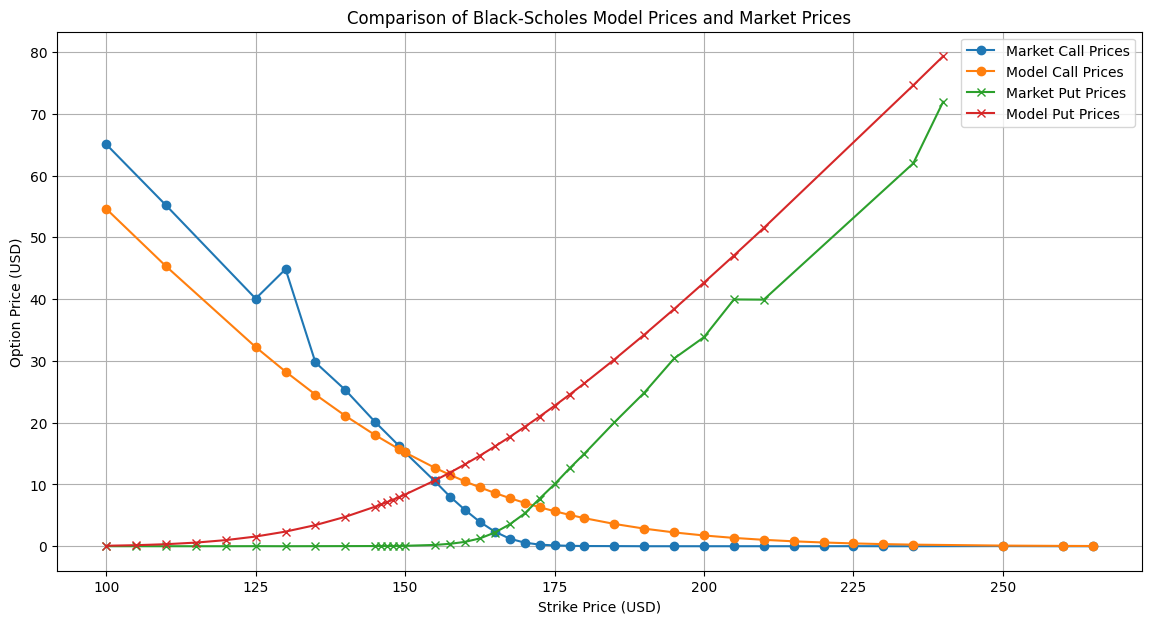

In [ ]:
# Fetch the current option chain for AAPL for the nearest available expiration date
aapl = yf.Ticker("AAPL")
option_chain = aapl.option_chain('2024-04-26')
market_calls = option_chain.calls
market_puts = option_chain.puts

# Arrays to store Black-Scholes prices
model_call_prices = []
model_put_prices = []

# Calculate Black-Scholes prices for the available market strike prices
for strike in market_calls['strike']:
    model_call_prices.append(black_scholes(S, strike, T, r, sigma, 'call'))
for strike in market_puts['strike']:
    model_put_prices.append(black_scholes(S, strike, T, r, sigma, 'put'))

# Plotting the comparison
plt.figure(figsize=(14, 7))

# Plot call prices
plt.plot(market_calls['strike'], market_calls['lastPrice'], 'o-', label='Market Call Prices')
plt.plot(market_calls['strike'], model_call_prices, 'o-', label='Model Call Prices')

# Plot put prices
plt.plot(market_puts['strike'], market_puts['lastPrice'], 'x-', label='Market Put Prices')
plt.plot(market_puts['strike'], model_put_prices, 'x-', label='Model Put Prices')

plt.title('Comparison of Black-Scholes Model Prices and Market Prices')
plt.xlabel('Strike Price (USD)')
plt.ylabel('Option Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

The graph appears to show the comparison between the Black-Scholes model prices and the actual market prices for both call and put options of a particular stock across various strike prices.

From the graph, we can infer the following:

- **Call Options**: The model call prices (represented by the orange line with circles) and the market call prices (represented by the blue line with circles) start to diverge as the strike price increases. The market prices are higher than the model prices for lower strike prices and then converge around a certain point before diverging again as the strike price continues to increase.

- **Put Options**: The market put prices (red line with crosses) and model put prices (green line with crosses) show a similar divergence pattern. For lower strike prices, the market prices are much higher than the model prices. The lines converge around the middle range of strike prices, indicating that the model prices are more in line with the market here. As the strike prices increase further, the market prices tend to be slightly higher than the model prices.

**Conclusions**:

1. **Volatility Skew**: The divergence between the model and market prices suggests a volatility skew, which is a situation where the implied volatility varies for different strike prices. This can happen due to various factors, including investor sentiment, demand and supply dynamics, or upcoming events that the market expects to affect the stock price.

2. **Over- or Underpricing**: Where the market prices are higher than the model prices, it could indicate that those options are overpriced by the market (or the model is underpricing them), which could be due to actual market conditions not being captured by the Black-Scholes model assumptions (e.g., constant volatility).

3. **Model Limitations**: The Black-Scholes model assumes constant volatility and does not take into account the actual market environment, which can lead to discrepancies when comparing with market prices that are influenced by a variety of dynamic factors.

4. **Potential Trading Strategies**: Traders might look for arbitrage opportunities in regions where there are significant differences between the model and market prices. However, it's crucial to account for transaction costs, liquidity, and the risk of changes in market conditions.

5. **Implied Volatility Assessment**: To get the model more in line with the market, an assessment of the implied volatility based on market prices could be performed, adjusting the model's volatility parameter to fit the market prices more closely.

6. **Market Sentiment**: The general trend of market prices being higher than the Black-Scholes prices could indicate a market sentiment that expects more significant price movements than what the historical volatility (used in the Black-Scholes model) suggests.


## **Step 10 : Delta neutral portfolio**

**The delta of an option is a measure of how much the price of the option is expected to move per one dollar change in the price of the underlying asset.**

In [ ]:
from scipy.stats import norm

def black_scholes_greeks(S, K, T, r, sigma, option_type='call'):
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate the delta of the option
    if option_type == 'call':
        delta = norm.cdf(d1)
        price = S * delta - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        delta = -norm.cdf(-d1)
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * (-delta)

    return price, delta

# Assuming we're using the same parameters from before
S = 150       # Current stock price
K_options = [130, 150, 170]  # Strike prices
T_options = [0.5, 1, 1.5]    # Time to maturities in years
r = 0.0464    # Risk-free rate
sigma = 0.1963 # Volatility

# Calculate Black-Scholes prices and deltas for the given strike prices and maturities
for K in K_options:
    for T in T_options:
        call_price_bs, call_delta_bs = black_scholes_greeks(S, K, T, r, sigma, 'call')
        put_price_bs, put_delta_bs = black_scholes_greeks(S, K, T, r, sigma, 'put')
        print(f"BS Strike: {K}, Time: {T} years, Call Price: {call_price_bs:.2f}, Call Delta: {call_delta_bs:.2f}")
        print(f"BS Strike: {K}, Time: {T} years, Put Price: {put_price_bs:.2f}, Put Delta: {put_delta_bs:.2f}")


BS Strike: 130, Time: 0.5 years, Call Price: 24.06, Call Delta: 0.90
BS Strike: 130, Time: 0.5 years, Put Price: 1.08, Put Delta: -0.10
BS Strike: 130, Time: 1 years, Call Price: 28.27, Call Delta: 0.86
BS Strike: 130, Time: 1 years, Put Price: 2.38, Put Delta: -0.14
BS Strike: 130, Time: 1.5 years, Call Price: 32.07, Call Delta: 0.84
BS Strike: 130, Time: 1.5 years, Put Price: 3.33, Put Delta: -0.16
BS Strike: 150, Time: 0.5 years, Call Price: 10.04, Call Delta: 0.59
BS Strike: 150, Time: 0.5 years, Put Price: 6.60, Put Delta: -0.41
BS Strike: 150, Time: 1 years, Call Price: 15.18, Call Delta: 0.63
BS Strike: 150, Time: 1 years, Put Price: 8.38, Put Delta: -0.37
BS Strike: 150, Time: 1.5 years, Call Price: 19.49, Call Delta: 0.66
BS Strike: 150, Time: 1.5 years, Put Price: 9.40, Put Delta: -0.34
BS Strike: 170, Time: 0.5 years, Call Price: 2.95, Call Delta: 0.25
BS Strike: 170, Time: 0.5 years, Put Price: 19.05, Put Delta: -0.75
BS Strike: 170, Time: 1 years, Call Price: 7.03, Call De

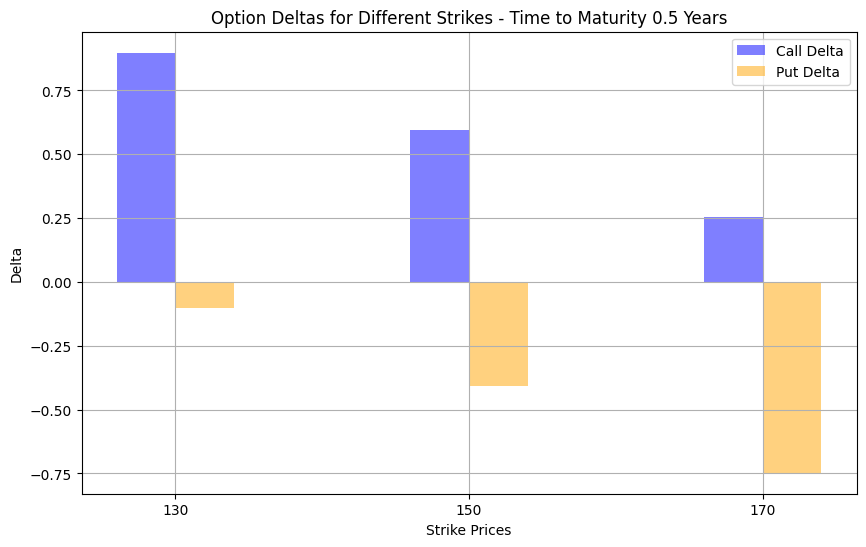

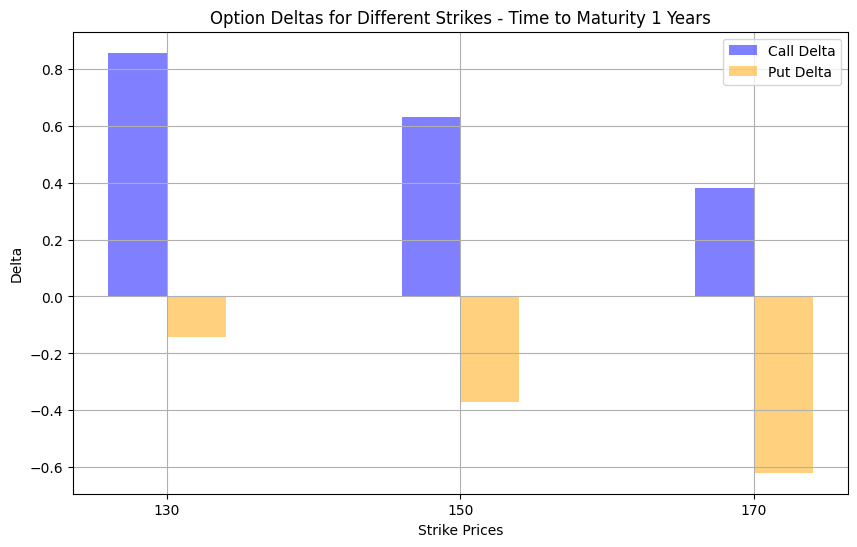

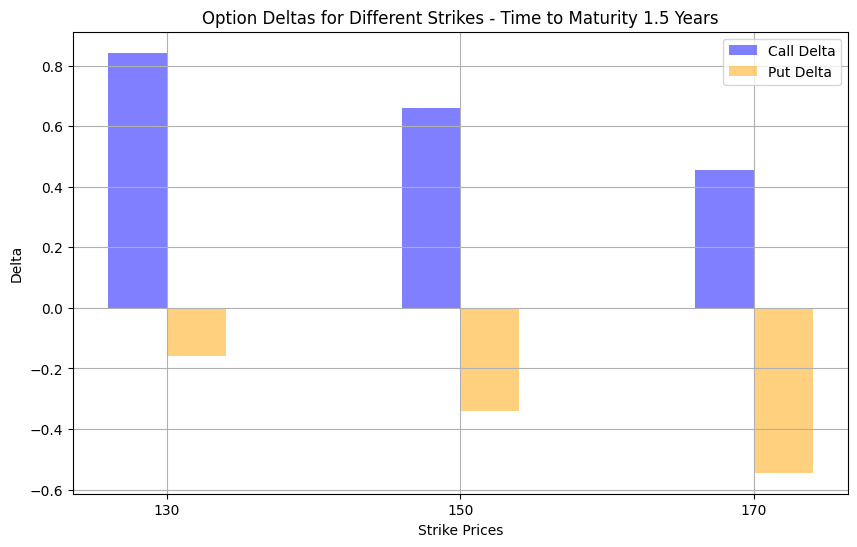

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
deltas_call = {T: [] for T in T_options}
deltas_put = {T: [] for T in T_options}

# Calculate Black-Scholes deltas for the given strike prices and maturities
for T in T_options:
    for K in K_options:
        _, delta_call = black_scholes_greeks(S, K, T, r, sigma, 'call')
        _, delta_put = black_scholes_greeks(S, K, T, r, sigma, 'put')
        deltas_call[T].append(delta_call)
        deltas_put[T].append(delta_put)

# Set the positions and width for the bars
pos = np.arange(len(K_options))
width = 0.2

# Plotting
for i, T in enumerate(T_options, start=1):
    plt.figure(figsize=(10, 6))
    plt.bar(pos - width/2, deltas_call[T], width, label='Call Delta', alpha=0.5, color='blue')
    plt.bar(pos + width/2, deltas_put[T], width, label='Put Delta', alpha=0.5, color='orange')

    # Adding labels and titles
    plt.xlabel('Strike Prices')
    plt.ylabel('Delta')
    plt.title(f'Option Deltas for Different Strikes - Time to Maturity {T} Years')
    plt.xticks(pos, [str(K) for K in K_options])
    plt.legend()
    plt.grid(True)
    plt.show()


**Looking at the provided bar plots representing the deltas of call and put options across different strike prices and times to maturity, we can draw the following conclusions:**

1. **Time to Maturity and Delta Relationship**:
   - For call options, the delta is higher for options that are further in-the-money (lower strike prices) and decreases as the strike price increases (moves out-of-the-money).
   - For put options, the magnitude of delta increases (becomes more negative) as the option goes further in-the-money (higher strike prices) and decreases as the strike price decreases (moves out-of-the-money).

2. **Effect of Time on Delta**:
   - The delta of call options for a given strike decreases slightly as time to maturity increases. This is because the probability of finishing in-the-money becomes more uncertain with more time until expiration.
   - The magnitude of the delta of put options increases as the time to maturity increases, particularly for in-the-money options (higher strike price).

3. **Sign of Delta**:
   - Call deltas are positive, indicating that the price of the call option increases as the price of the underlying asset increases.
   - Put deltas are negative, meaning the price of the put option increases as the price of the underlying decreases.

4. **Delta Magnitudes**:
   - Call option deltas range from 0 to 1. A delta near 1 suggests the option is deep in-the-money and behaves similarly to the underlying stock.
   - Put option deltas range from -1 to 0. A delta near -1 suggests the put is deep in-the-money and its price moves nearly dollar-for-dollar with the underlying stock but in the opposite direction.

5. **Hedging Implications**:
   - The higher the magnitude of delta, the more shares you would need to trade to hedge. For instance, at the 130 strike, you would hedge more shares for the call option with a higher delta compared to the 170 strike with a lower delta.
   - As time to maturity increases, you would need to adjust the hedge to maintain a delta-neutral position because the delta changes with time and stock price movements.

6. **Portfolio Strategy**:
   - A trader might choose a specific time to maturity based on their expectations of market movements and the corresponding deltas.
   - Options with deltas closest to 0.5 or -0.5 are typically at-the-money, and as such, their price is more sensitive to changes in the underlying stock price, which could be a target for certain trading strategies.



##**Step: 11 Implied volatility Using numerical methods "Brent method"**

In [ ]:
import pandas as pd
import yfinance as yf
from scipy.optimize import brentq

# Ensure you have the black_scholes function defined as above
# Define the objective function to find implied volatility
def find_implied_volatility(market_price, S, K, T, r, option_type):
    def objective_function(sigma):
        # Black-Scholes formula minus the market price
        return black_scholes(S, K, T, r, sigma, option_type) - market_price

    # Set initial bounds for volatility (0.01 and 4 are commonly used)
    lower_bound = 0.1
    upper_bound = .0

    # Check if f(lower_bound) and f(upper_bound) have different signs
    if objective_function(lower_bound) * objective_function(upper_bound) > 0:
        raise ValueError("f(lower_bound) and f(upper_bound) do not have different signs. The bounds may need to be adjusted.")

    # Use Brent's method to find the root where the objective function equals zero
    implied_volatility = brentq(objective_function, lower_bound, upper_bound)
    return implied_volatility

# Fetch the current option chain for AAPL for the nearest available expiration date
aapl = yf.Ticker("AAPL")
options_chain = aapl.option_chain('2024-04-26')
market_calls = options_chain.calls
market_puts = options_chain.puts

# Assume T and r as given
T = (pd.to_datetime('2024-04-26') - pd.Timestamp.today()).days / 365.25
r = 0.0464  # Risk-free interest rate

# Get the current stock price from the history
S = aapl.history(period="1d")["Close"].iloc[-1]

# Calculate implied volatilities
call_ivs = {}
for index, row in market_calls.iterrows():
    K = row['strike']
    market_price = row['lastPrice']
    try:
        iv = find_implied_volatility(market_price, S, K, T, r, 'call')
        call_ivs[K] = iv
    except ValueError as e:
        call_ivs[K] = "Error: " + str(e)

put_ivs = {}
for index, row in market_puts.iterrows():
    K = row['strike']
    market_price = row['lastPrice']
    try:
        iv = find_implied_volatility(market_price, S, K, T, r, 'put')
        put_ivs[K] = iv
    except ValueError as e:
        put_ivs[K] = "Error: " + str(e)

# Displaying the results
print("Call Implied Volatilities:")
for K, iv in call_ivs.items():
    print(f"Strike: {K}, IV: {iv}")

print("\nPut Implied Volatilities:")
for K, iv in put_ivs.items():
    print(f"Strike: {K}, IV: {iv}")


Call Implied Volatilities:
Strike: 100.0, IV: Error: f(lower_bound) and f(upper_bound) do not have different signs. The bounds may need to be adjusted.
Strike: 110.0, IV: 1.5760204118993162
Strike: 125.0, IV: 0.6767562726085805
Strike: 130.0, IV: 3.4128465863224866
Strike: 135.0, IV: Error: f(lower_bound) and f(upper_bound) do not have different signs. The bounds may need to be adjusted.
Strike: 140.0, IV: 0.7919394058899213
Strike: 145.0, IV: 0.4112810694864792
Strike: 149.0, IV: 0.49919573129296047
Strike: 150.0, IV: 0.42907289320381686
Strike: 155.0, IV: 0.4297883342399841
Strike: 157.5, IV: 0.3604924497545055
Strike: 160.0, IV: 0.34131515536094464
Strike: 162.5, IV: 0.3180227244475056
Strike: 165.0, IV: 0.3009864579112142
Strike: 167.5, IV: 0.28683588183180114
Strike: 170.0, IV: 0.2858420681334847
Strike: 172.5, IV: 0.2913619469692648
Strike: 175.0, IV: 0.30927384158906335
Strike: 177.5, IV: 0.3315046745525235
Strike: 180.0, IV: 0.34467999060625476
Strike: 185.0, IV: 0.419930819789

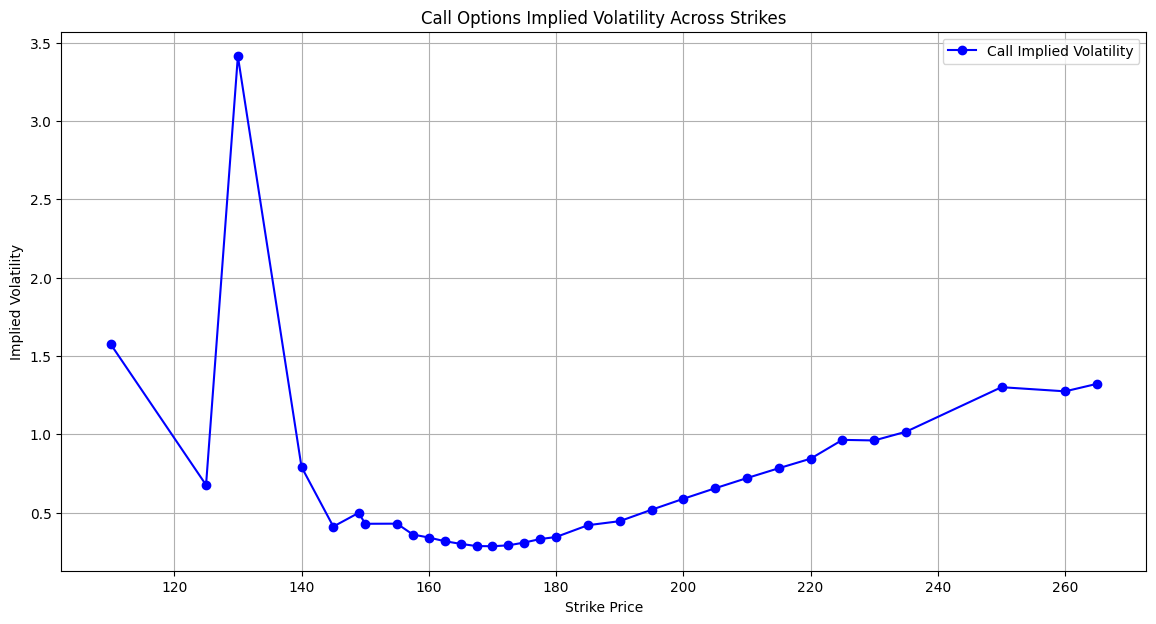

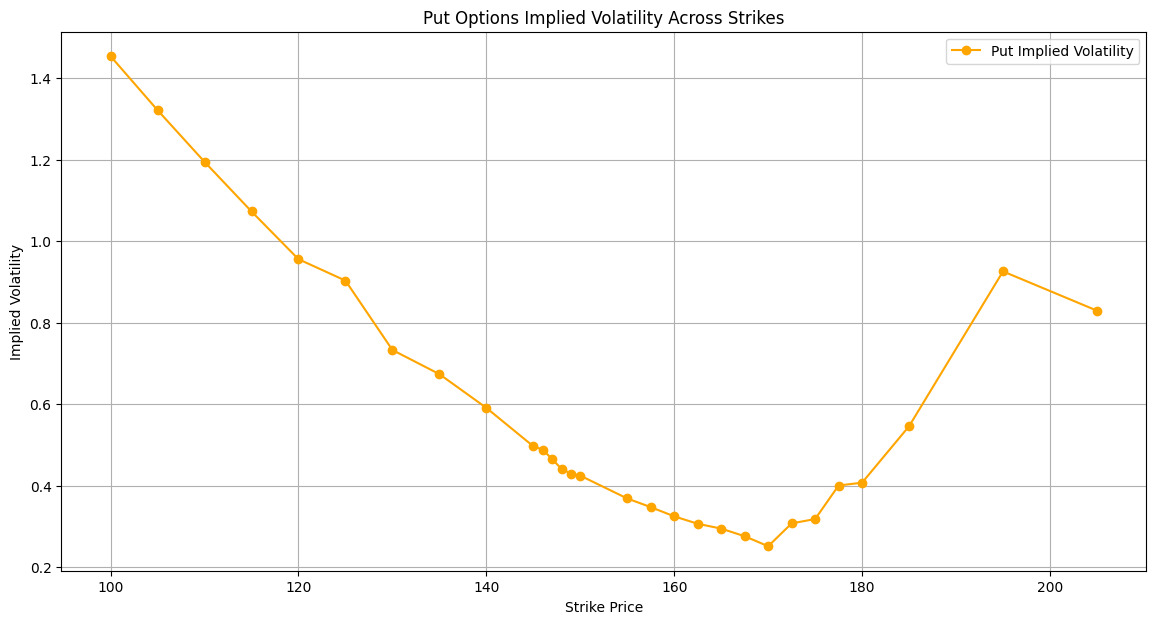

In [ ]:
import matplotlib.pyplot as plt

# Filter out errors and prepare call data for plotting
call_strikes_valid = [110.0, 125.0, 130.0, 140.0, 145.0, 149.0, 150.0, 155.0, 157.5, 160.0, 162.5, 165.0, 167.5, 170.0, 172.5, 175.0, 177.5, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 215.0, 220.0, 225.0, 230.0, 235.0, 250.0, 260.0, 265.0]
call_ivs_valid = [1.5760204118993475, 0.6767562726077873, 3.412846586322434, 0.7919394058899233, 0.4112810694866045, 0.4991957312929533, 0.429072893203829, 0.4297883342399988, 0.3604924497545469, 0.34131515536092843, 0.31802272444749125, 0.30098645791123535, 0.2868358818318024, 0.28584206813339114, 0.291361946969255, 0.30927384158904936, 0.3315046745529138, 0.3446799906062538, 0.4199308197898856, 0.4456911155969562, 0.5185034038506563, 0.5884182655995285, 0.6557481646435582, 0.7207377458983676, 0.7835859928958293, 0.8444593177400415, 0.9645516237197178, 0.9608309433892185, 1.0165610920905468, 1.300766540845194, 1.2742516301573723, 1.3220987892191407]

# Prepare put data for plotting, ignoring errors
put_strikes_valid = [100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 155.0, 157.5, 160.0, 162.5, 165.0, 167.5, 170.0, 172.5, 175.0, 177.5, 180.0, 185.0, 195.0, 205.0]
put_ivs_valid = [1.453879514204213, 1.3215011384392148, 1.1947735487858087, 1.073100901511744, 0.9559474923490523, 0.903453341571157, 0.7332600542548895, 0.6740429531303164, 0.5913437228187862, 0.49704332106970844, 0.48895493605461426, 0.46537463983325184, 0.4418221664232276, 0.42989631754878727, 0.4249790142547716, 0.36899590883117245, 0.3477886698511065, 0.3251810853771145, 0.30696962915879167, 0.29511017305984616, 0.27638936809756837, 0.2519081551796725, 0.307885033601577, 0.31862415251862847, 0.4008327037680347, 0.4077936145305118, 0.5462863579302751, 0.9260719849496521, 0.8298000173487053]

# Plot Call Implied Volatilities
plt.figure(figsize=(14, 7))
plt.plot(call_strikes_valid, call_ivs_valid, 'o-', color='blue', label='Call Implied Volatility')
plt.title('Call Options Implied Volatility Across Strikes')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Plot Put Implied Volatilities
plt.figure(figsize=(14, 7))
plt.plot(put_strikes_valid, put_ivs_valid, 'o-', color='orange', label='Put Implied Volatility')
plt.title('Put Options Implied Volatility Across Strikes')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()


 **Here's an analysis based on common trends in implied volatility:**

1. **Call Options Implied Volatility (First Chart):**
   - There is a pronounced spike in implied volatility at a lower strike price, indicating that options were priced with a much higher volatility assumption, perhaps due to a specific event or market condition expected to affect the underlying stock significantly.
   - After the spike, implied volatility sharply decreases, which may suggest the options are transitioning from in-the-money to at-the-money or slightly out-of-the-money.
   - As the strike price increases further, the implied volatility gradually rises, forming an upward trend. This could be indicative of a volatility skew, where the market prices in a higher likelihood of significant price movements as the option goes deeper out-of-the-money.

2. **Put Options Implied Volatility (Second Chart):**
   - The implied volatility steadily decreases as the strike price increases from deep out-of-the-money to at-the-money, which is typical in many markets due to the higher probability of in-the-money put options being exercised.
   - There is a trough in the chart, after which implied volatility starts to increase. This increase for higher strike prices (moving from at-the-money to in-the-money options) suggests that the market may be pricing in some uncertainty or risk of downside in the underlying asset.

**General Observations:**

- **Volatility Smile:** If the implied volatility forms a 'U' shape across strikes, it's called a volatility smile, indicating that the market is pricing higher volatility for options that are in-the-money or out-of-the-money compared to at-the-money options.
- **Volatility Skew:** An upward or downward trend in implied volatility across strikes is known as volatility skew. It reflects market sentiment that is not symmetric around the current price of the underlying asset. A skew often suggests that traders are expecting significant moves in one direction more than the other.

